### b)

there are $$ \binom{n}{3} $$ different sets of three nodes, the average number of triangles is the number of such sets multiplied by the probability that the 3 edges exist: $$ \binom{n}{3} * p^3 $$


there are $n$ possible middle nodes
$(n-1)!(n-2)!/2$ possible ways of selecting the other two nodes
and $\binom{3}{2}p^2(p-1)$ probability that in a set of 3 nodes the edges form a chain
so there are
    $$ \binom{n}{3} * 3 / 2 * \binom{3}{2}p^2(p-1)$$

In [10]:
import pandas as pd

In [43]:
import os
import path
import pandas as pd

folder = os.getcwd()
preprocessedFolder = "results"
folder = os.path.join(folder, preprocessedFolder)

networks = ["circuit1",
            "circuit2",
            "eColi",
            "yeast",
            "english",
            "french",
            "spanish",
            "residence",
            "highschool"
            ]

dfs = {}
for network in networks:
    dir = os.path.join(folder, network + ".txt")
    dfs[network] = pd.read_csv(dir, sep=", ")
    dfs[network].rename(columns=dfs[network].iloc[0]).drop(dfs[network].index[0])
    dfs[network] = dfs[network].drop("adjmatrix", axis=1)
    #threre where some inf values:
    dfs[network].loc[dfs[network]['occ_original'] <=1, 'z_score'] = 0
    #normalize the z_score:
    z_score = dfs[network]["z_score"]
    dfs[network]["z_score"]=z_score/(sum(z_score**2))**0.5


dfs["yeast"]


/tmp/ipykernel_28532/1252098644.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfs[network] = pd.read_csv(dir, sep=", ")
/tmp/ipykernel_28532/1252098644.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfs[network] = pd.read_csv(dir, sep=", ")
/tmp/ipykernel_28532/1252098644.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfs[network] = pd.read_csv(dir, sep=", ")
/tmp/ipykernel_28532/1252098644.py

,occ_original,z_score,avg_random,stdev_random
0,889,-0.593262,947.334,4.221147
1,293,-0.383703,371.180,8.746920
2,0,0.000000,0.000,0.000000
3,0,0.000000,0.000,0.000000
4,1,0.000000,0.000,0.000000
5,11878,-0.409848,11951.606,7.709841
6,70,0.568142,14.444,4.197869
7,18,0.100254,1.942,6.876133
8,1,0.000000,0.000,0.000000
9,0,0.000000,0.000,0.000000


<AxesSubplot:>

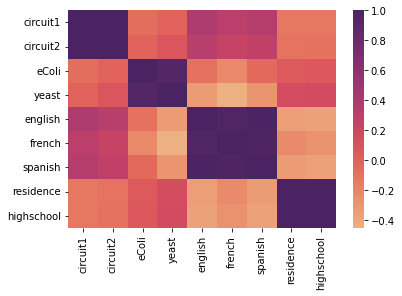

In [44]:
z_scores = {}
for network in networks:
    z_scores[network] = dfs[network]["z_score"]
z_scores = pd.DataFrame(z_scores)

correlations = z_scores.corr("pearson")

import seaborn as sns

palette = sns.color_palette("flare", as_cmap=True)

sns.heatmap(correlations, cmap=palette)


/tmp/ipykernel_28532/3531660061.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfs[network] = pd.read_csv(dir, sep=", ")
/tmp/ipykernel_28532/3531660061.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfs[network] = pd.read_csv(dir, sep=", ")
/tmp/ipykernel_28532/3531660061.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfs[network] = pd.read_csv(dir, sep=", ")


<AxesSubplot:>

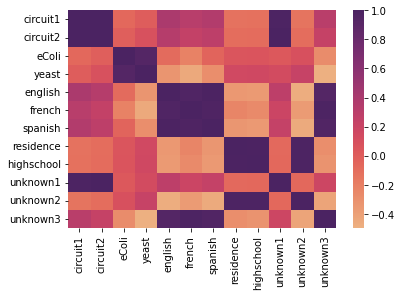

In [51]:
unknowns = [
    "unknown1",
    "unknown2",
    "unknown3",
]
for network in unknowns:
    dir = os.path.join(folder, network + ".txt")
    dfs[network] = pd.read_csv(dir, sep=", ")
    dfs[network].rename(columns=dfs[network].iloc[0]).drop(dfs[network].index[0])
    dfs[network] = dfs[network].drop("adjmatrix", axis=1)
    #threre where some inf values:
    dfs[network].loc[dfs[network]['occ_original'] <=1, 'z_score'] = 0
    #normalize the z_score:
    z_score = dfs[network]["z_score"]
    dfs[network]["z_score"]=z_score/(sum(z_score**2))**0.5

z_scores = {}
for network in (networks + unknowns):
    z_scores[network] = dfs[network]["z_score"]
z_scores = pd.DataFrame(z_scores)

correlations = z_scores.corr("pearson")

import seaborn as sns

palette = sns.color_palette("flare", as_cmap=True)

sns.heatmap(correlations, cmap=palette)

In [50]:
correlations


,circuit1,circuit2,eColi,yeast,english,french,spanish,residence,highschool
circuit1,1.000000,0.995190,-0.069771,0.002221,0.397536,0.315537,0.349331,-0.126067,-0.121661
circuit2,0.995190,1.000000,-0.006446,0.082646,0.332332,0.243341,0.285611,-0.094932,-0.089825
eColi,-0.069771,-0.006446,1.000000,0.940432,-0.085683,-0.220113,-0.040867,0.053417,0.063328
yeast,0.002221,0.082646,0.940432,1.000000,-0.332944,-0.450472,-0.287817,0.149124,0.158148
english,0.397536,0.332332,-0.085683,-0.332944,1.000000,0.961210,0.988493,-0.350339,-0.366673
french,0.315537,0.243341,-0.220113,-0.450472,0.961210,1.000000,0.969567,-0.234615,-0.265516
spanish,0.349331,0.285611,-0.040867,-0.287817,0.988493,0.969567,1.000000,-0.336255,-0.359837
residence,-0.126067,-0.094932,0.053417,0.149124,-0.350339,-0.234615,-0.336255,1.000000,0.991584
highschool,-0.121661,-0.089825,0.063328,0.158148,-0.366673,-0.265516,-0.359837,0.991584,1.000000


<AxesSubplot:>

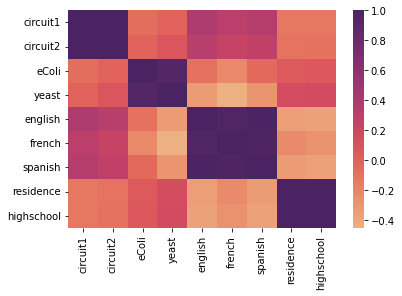

In [36]:
import seaborn as sns

palette = sns.color_palette("flare", as_cmap=True)

sns.heatmap(correlations, cmap=palette)

In [14]:
import os
import path

folder = os.getcwd()
preprocessedFolder = "/results"
folder = os.path.join(folder, preprocessedFolder)